In [83]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Loading Dataset
df = pd.read_csv(r'C:\Users\ashwi\OneDrive\Documents\archive (6)\car_price_prediction.csv')

In [84]:
# Display Head in Dataframe
df.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [85]:
# Checking Data Types and Missing Values
df.info()

# Checking Null Values In each Column
df.isnull().sum()

# Display Basic Stats for columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          1000 non-null   object 
 1   Model         1000 non-null   object 
 2   Year          1000 non-null   int64  
 3   Engine Size   1000 non-null   float64
 4   Mileage       1000 non-null   int64  
 5   Fuel Type     1000 non-null   object 
 6   Transmission  1000 non-null   object 
 7   Price         1000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


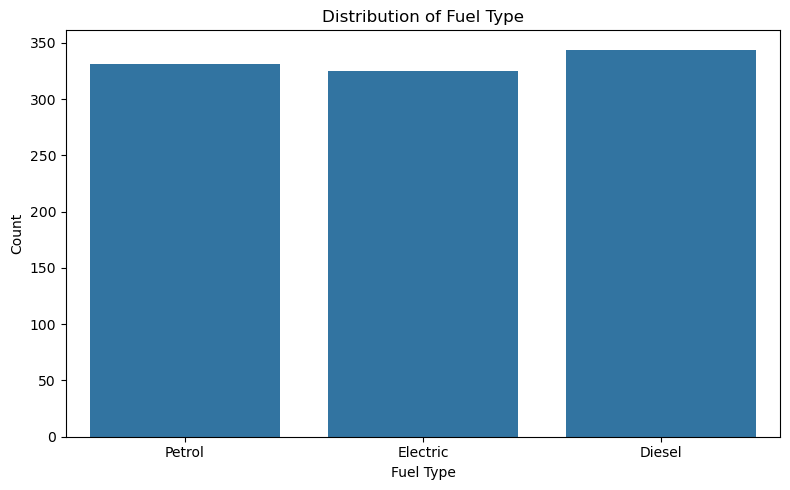

In [86]:
#Bar Chart 
plt.figure(figsize=(8,5))
sns.countplot(x='Fuel Type', data=df)
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

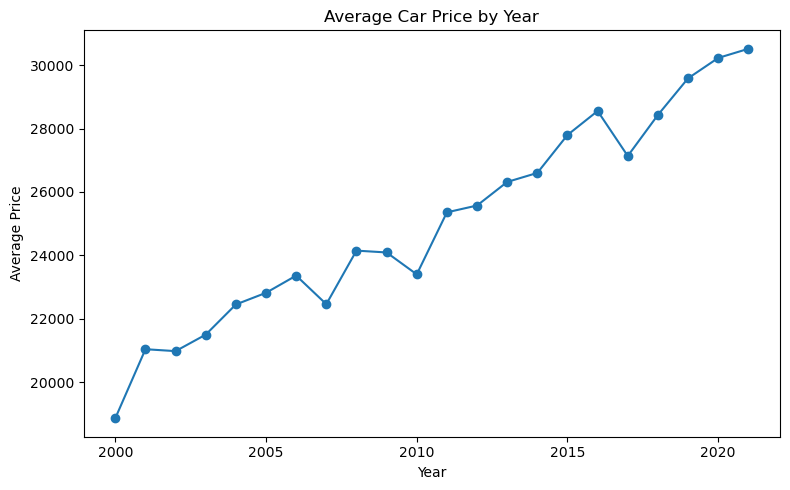

In [87]:
#Line Plot
# Calculate average price per year
avg_price_by_year = df.groupby('Year')['Price'].mean().sort_index()
plt.figure(figsize=(8,5))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o')
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

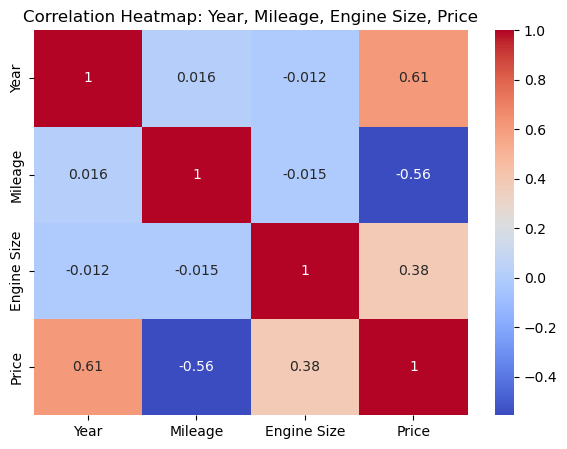

In [88]:
# Map Condition to numerical values and plot correlation heatmap
cols_for_corr = ['Year', 'Mileage', 'Engine Size', 'Price']
corr = df[cols_for_corr].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Year, Mileage, Engine Size, Price')
plt.show()

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

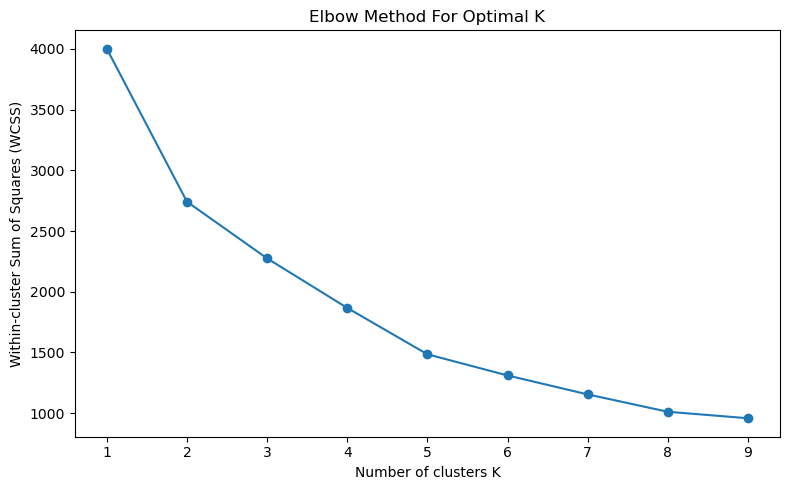

In [94]:
#Elbow Chart
# Select relevant features and scale them
features = ['Year', 'Mileage', 'Engine Size', 'Price']
X = df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scald)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,10), wcss, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.tight_layout()
plt.show()

C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


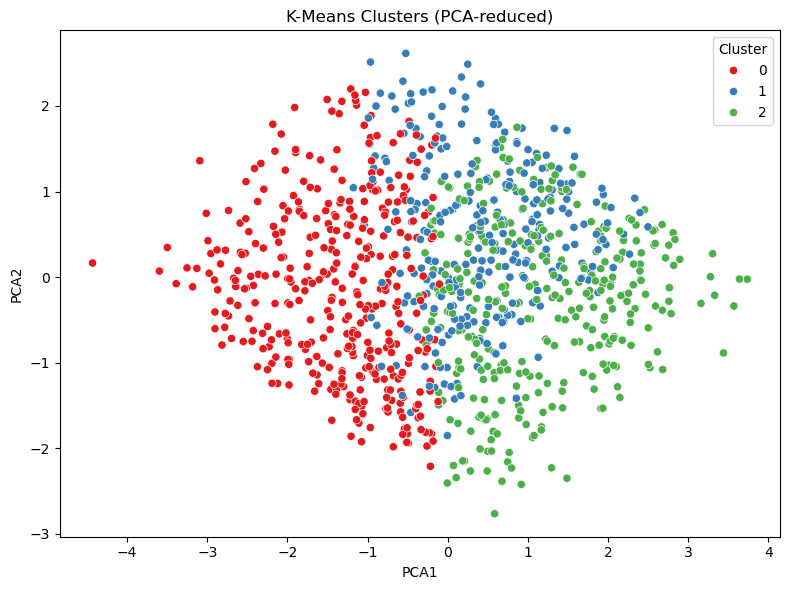

In [90]:
# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# For visualization, reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

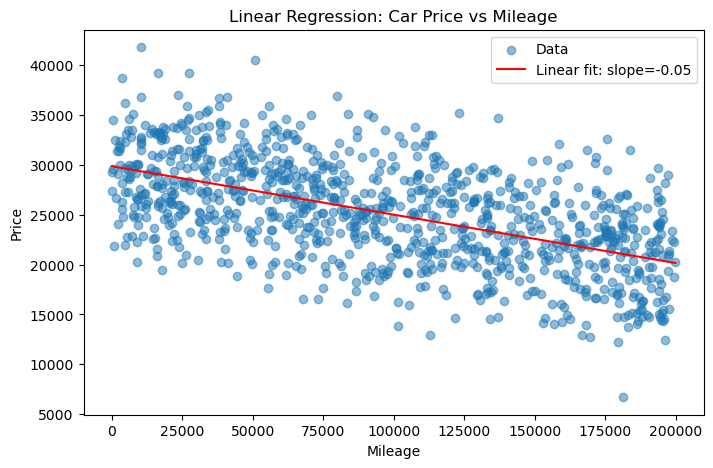

In [91]:
# Prepare input/output
X = df[['Mileage']].values
y = df['Price'].values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predicted line
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_pred = model.predict(X_range)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.5, label='Data')
plt.plot(X_range, y_pred, color='red', label=f'Linear fit: slope={model.coef_[0]:.2f}')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Linear Regression: Car Price vs Mileage')
plt.legend()
plt.show()